**LAB 7:**
**NHẬN DẠNG CHỮ VIẾT TAY VỚI THƢ VIỆN KERAS**

1. Mô tả dữ liệu MNIST cho bài toán nhận dạng chữ viết tay:

In [37]:
import pandas as pd
import numpy as np
# thư viện này để hiển thị các tấm ảnh
import matplotlib.pyplot as plt
from keras.preprocessing.image import img_to_array, load_img
# thư viện này để hiển thị các tấm ảnh
import random
import os
# để load dữ liệu trong tập mẫu
from keras.datasets import mnist
from keras.models import load_model
from matplotlib import image
# các hàm sau để xây dựng mô hình mạng neural
# thêm 1 lớp, thêm hàm kích hoạt activation
from keras.models import Sequential
from keras.utils import to_categorical
from keras.layers import Dense, Activation

In [38]:
# dữ liệu trong tập data mnist là 60000 tấm ảnh trắng đen có kích thước là 28X28 pixel
# mỗi pixel có giá trị từ 0-
#255, 0 là màu đen và 255 là màu trắng sáng nhất các giá trị càng gần với 255 thì càng sáng
# xem shape của tập train, sau khi xem thì ta sẽ thấy thông tin x_train shape (60000, 28, 28)
# nghĩa là có 60000 tấm ảnh trong tập train, mỗi tấm ảnh có kích thước 28*28
(x_train,y_train),(x_test,y_test)=mnist.load_data()

In [39]:
print("x_train shape",x_train.shape)

x_train shape (60000, 28, 28)


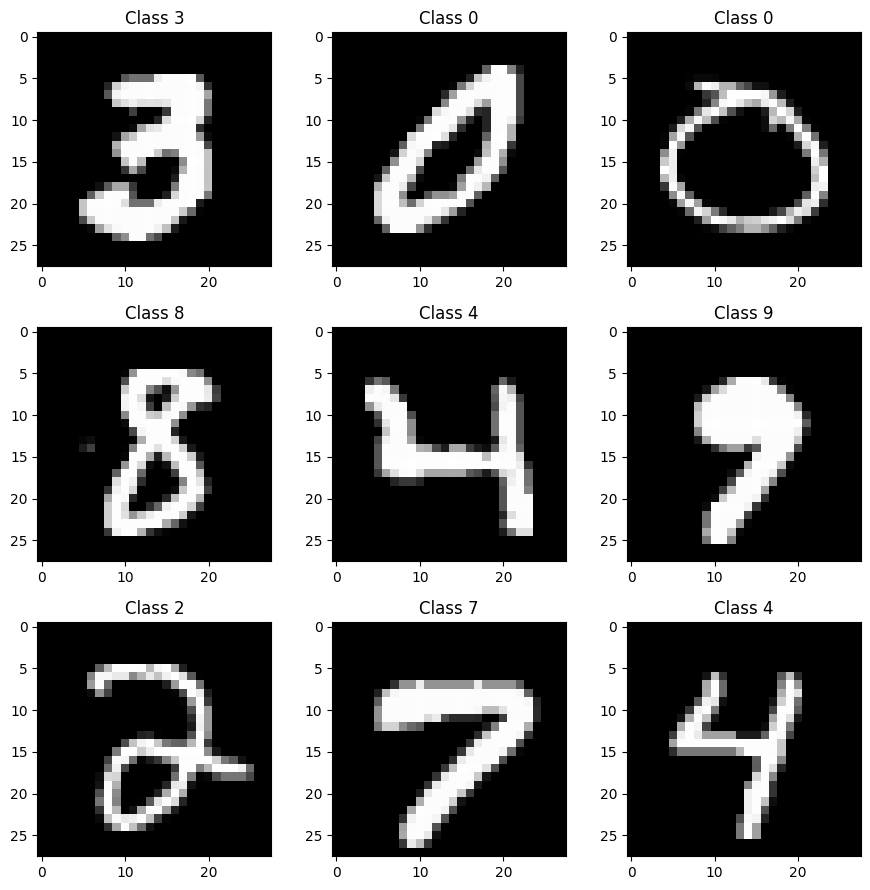

In [40]:
plt.rcParams['figure.figsize']=(9,9)
for i in range(9):
  plt.subplot(3,3,i+1)
  num=random.randint(0,len(x_train))
  plt.imshow(x_train[num],cmap='gray',interpolation=None)
  plt.title('Class {}'.format(y_train[num]))
plt.tight_layout()

In [41]:
x_train=x_train.reshape(60000,784)
x_train=x_train.astype('float32')
# chuẩn hóa dữ liệu nằm trong khoảng 0-1 nên chia cho 255
x_train/=255

In [42]:
print(x_train)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [43]:
x_test=x_test.reshape(10000,784)
x_test=x_test.astype('float32')
x_test/=255

In [44]:
print(x_test)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


2. Quá trình học và dự báo:

In [45]:
nb_class = 10
y_train = to_categorical(y_train, nb_class)
y_test = to_categorical(y_test, nb_class)

In [46]:
model= Sequential()
#add vào 1 lớp input,có 10 neural(10 neural) và mỗi neural có 784 input
model.add(Dense(10,input_shape=(784,)))
model.add(Activation('relu'))
# add lớp hidden sẽ tự động lấy đầu vào của lớp đầu, giá trị hiden có thể thay đổi
model.add(Dense(40))
model.add(Activation('relu'))
# add vào lớp đầu ra, bắt buộc là 10 vì số từ 0->9 là 10 số
model.add(Dense(10))
# dùng hàm softmax vì đầu ra là 10 lớp (nhận dạng số 0-9)
model.add(Activation('softmax'))
model.summary()
model.compile(loss='categorical_crossentropy',optimizer='rmsprop',metrics
=['accuracy'])
#mỗi lần lấy 128 tấm ảnh để train
history=model.fit (x_train, y_train, batch_size = 128, epochs = 5,verbose
= 2,validation_data = ( x_test, y_test ))

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 10)                7850      
                                                                 
 activation_3 (Activation)   (None, 10)                0         
                                                                 
 dense_4 (Dense)             (None, 40)                440       
                                                                 
 activation_4 (Activation)   (None, 40)                0         
                                                                 
 dense_5 (Dense)             (None, 10)                410       
                                                                 
 activation_5 (Activation)   (None, 10)                0         
                                                                 
Total params: 8700 (33.98 KB)
Trainable params: 8700 (

In [47]:
save_dir = "/ results /"
model_name = 'keras_mnist.h5'
model_path = os.path.join(save_dir, model_name)
model.save (model_path)
print( 'Saved trained model at %s ' % model_path )

Saved trained model at / results /keras_mnist.h5 


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


313/313 - 1s - loss: 0.2162 - accuracy: 0.9367 - 561ms/epoch - 2ms/step
Test Loss 0.21617542207241058
Test Accuracy 0.9366999864578247


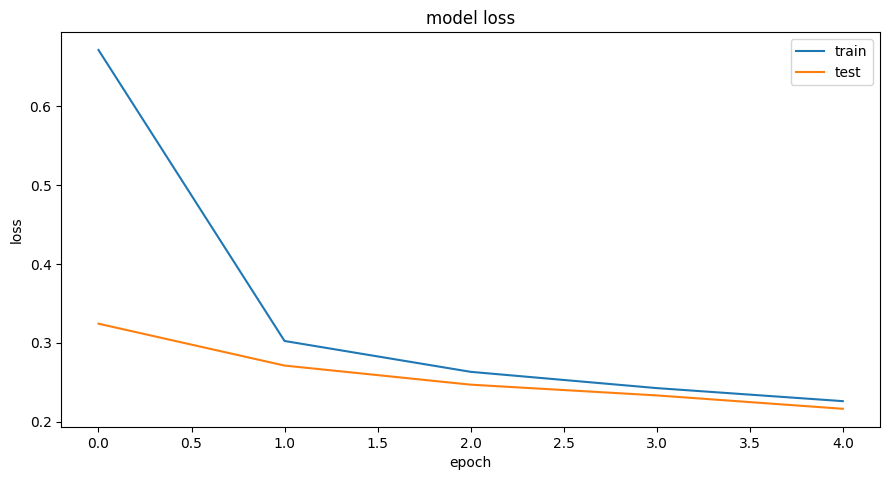

In [48]:
plt.subplot (2,1,2)
plt.plot( history.history ['loss'])
plt.plot( history.history['val_loss'])
plt.title('model loss' )
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper right')
plt.tight_layout ()
mnist_model = load_model(model_path)
loss_and_metrics = mnist_model.evaluate( x_test, y_test, verbose = 2 )
print( "Test Loss" , loss_and_metrics [0])
print( "Test Accuracy" , loss_and_metrics[1])

In [59]:
def load_image(filename, target_size=(28, 28)):
    try:
        img = load_img(filename, color_mode='grayscale', target_size=target_size)
        img = img_to_array(img)
        img = img.reshape(1, 28, 28, 1)
        img = img.astype('float32')
        img = img / 255.0
        return img
    except FileNotFoundError:
        print(f"File {filename} not found. Please check the path and try again.")
        return None

# Check current working directory
print("Current working directory:", os.getcwd())

# Path to the image file
image_path = 'path/to/your/image/so2.JPG'  # Replace with your image path

# Load the image to be predicted
image_test = load_image(image_path)

if image_test is not None:
    # Assume you have a trained model named `mnist_model`
    # mnist_model = ...

    # Predict the digit for the loaded image
    digit = mnist_model.predict(image_test)
    print(f"Predicted digit: {np.argmax(digit)}")
else:
    print("Image could not be loaded for prediction.")

Current working directory: /content
File path/to/your/image/so2.JPG not found. Please check the path and try again.
Image could not be loaded for prediction.


313/313 [==============================] - 1s 5ms/step


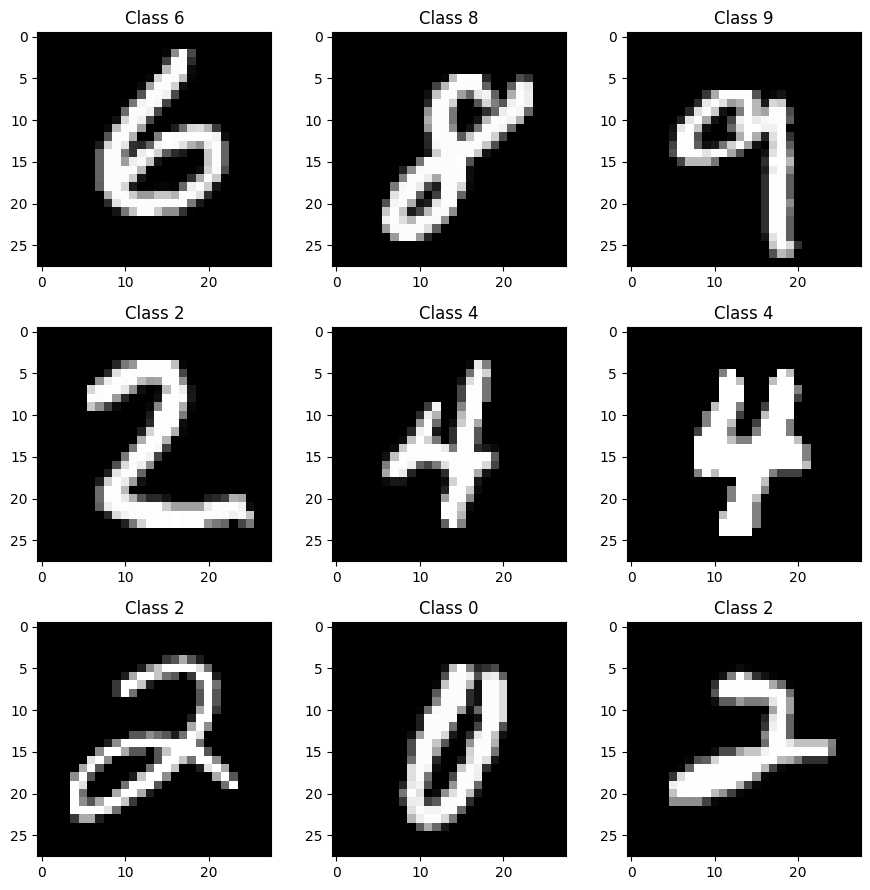

In [61]:
Predicted_classes = mnist_model.predict(x_test)
plt.rcParams['figure.figsize']=(9,9)
for i in range(9):
  plt.subplot(3,3,i+1)
  num=random.randint(0,len(x_test))
  plt.imshow(x_test[num].reshape(28,28),cmap='gray',interpolation=None)
  plt.title('Class {}'.format(Predicted_classes[num].argmax()))
plt.tight_layout()